# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

# Data

In [2]:
files_path = '../data/'

In [3]:
X_train = pd.read_csv(f'{files_path}train_values.csv', engine='c')

y_train = pd.read_csv(f'{files_path}train_labels.csv', engine='c').damage_grade

In [4]:
X_train.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_agriculture  \
0                      t               r  ...                             0   
1                      o               r  ...                             0   
2                      t               r  ...                             0   
3                      t               r  ...                             0   
4                      t               r  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 39 columns]

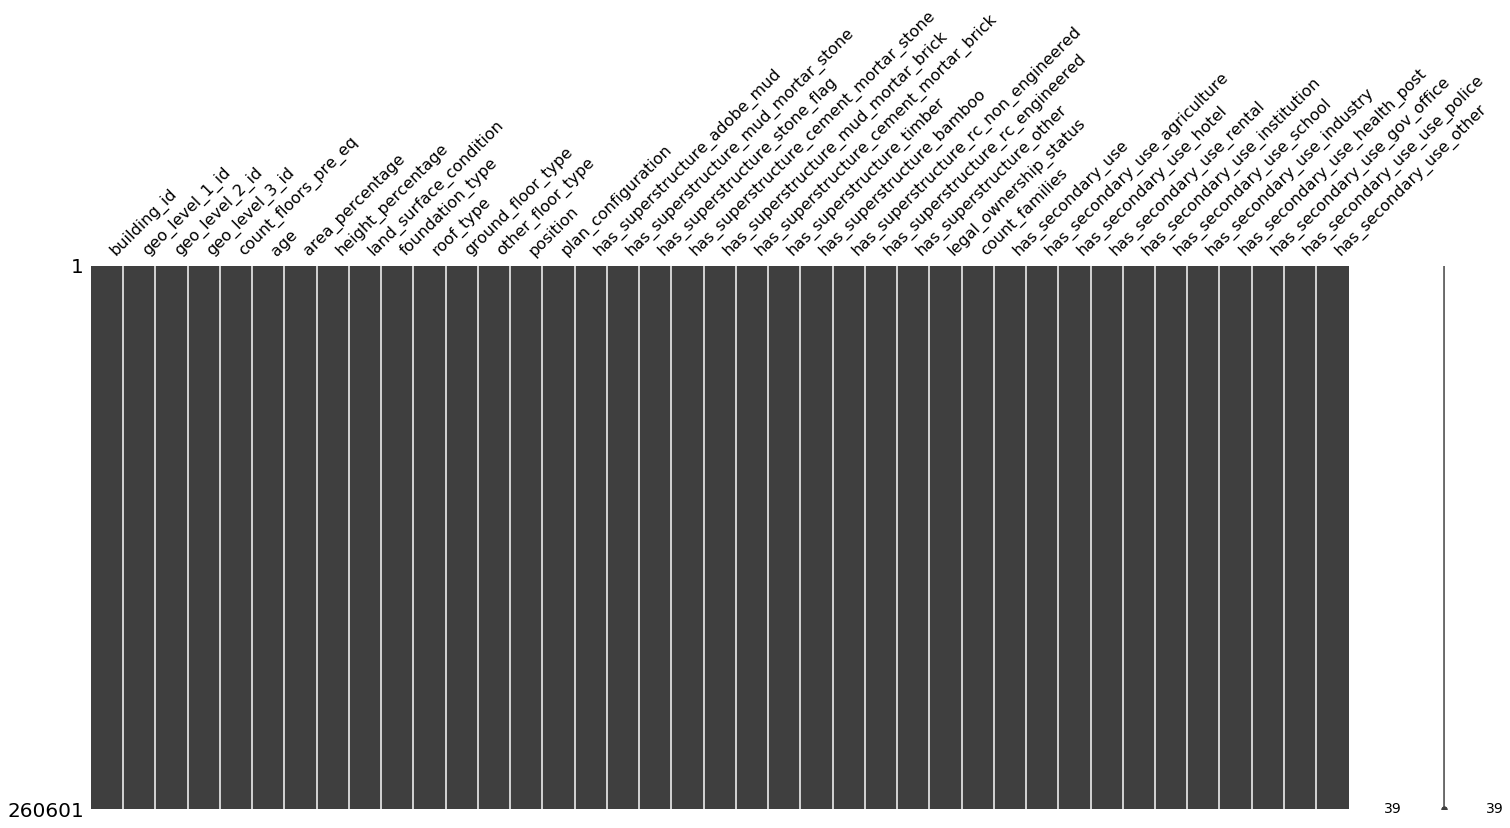

In [62]:
msno.matrix(X_train)

# Categorical Features

In [5]:
X_train_cat = X_train.select_dtypes('object')
X_train_cat.head()

land_surface_condition foundation_type roof_type ground_floor_type  \
0                      t               r         n                 f   
1                      o               r         n                 x   
2                      t               r         n                 f   
3                      t               r         n                 f   
4                      t               r         n                 f   

  other_floor_type position plan_configuration legal_ownership_status  
0                q        t                  d                      v  
1                q        s                  d                      v  
2                x        t                  d                      v  
3                x        s                  d                      v  
4                x        s                  d                      v

In [6]:
cat_cols = X_train_cat.columns.tolist()
cat_cols[:3]

['land_surface_condition', 'foundation_type', 'roof_type']

#### Frequency encoding

In [7]:
for col in cat_cols:
    print(f'Processing {col}...')
    dict_num = dict()
    val_cnt = X_train_cat[col].value_counts()
    n = 0
    for cat in val_cnt.index.tolist():
        dict_num[cat] = n
        n += 1
    X_train[col] = X_train[col].apply(lambda x: dict_num[x])

Processing land_surface_condition...
Processing foundation_type...
Processing roof_type...
Processing ground_floor_type...
Processing other_floor_type...
Processing position...
Processing plan_configuration...
Processing legal_ownership_status...


In [8]:
X_train.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

   land_surface_condition  foundation_type  ...  \
0                       0                0  ...   
1                       2                0  ...   
2                       0                0  ...   
3                       0                0  ...   
4                       0                0  ...   

   has_secondary_use_agriculture  has_secondary_use_hotel  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   

   has_secondary_use_rental  has_secondary_use_institution  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   has_secondary_use_school  has_secondary_use_industry  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  
0                             0                        0  
1                             0                        0  
2                             0                        0  
3                             0                        0  
4                             0                        0  

[5 rows x 39 columns]

In [9]:
X_train['land_surface_condition'].value_counts()

0    216757
1     35528
2      8316
Name: land_surface_condition, dtype: int64

In [11]:
train = pd.concat([X_train, y_train], axis=1)

In [12]:
train.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

   land_surface_condition  foundation_type  ...  has_secondary_use_hotel  \
0                       0                0  ...                        0   
1                       2                0  ...                        0   
2                       0                0  ...                        0   
3                       0                0  ...                        0   
4                       0                0  ...                        0   

   has_secondary_use_rental  has_secondary_use_institution  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   has_secondary_use_school  has_secondary_use_industry  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  damage_grade  
0                             0                        0             3  
1                             0                        0             2  
2                             0                        0             3  
3                             0                        0             2  
4                             0                        0             3  

[5 rows x 40 columns]

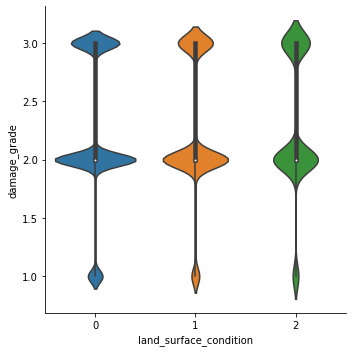

In [15]:
sns.catplot(x="land_surface_condition", y="damage_grade",
            kind="violin", split=True, data=train);

# Numerical Features

#### Encoding features to lower bit resolution

In [68]:
X_train.dtypes.value_counts()

int64    39
dtype: int64

In [69]:
max_values_in_cols = X_train.max()

In [70]:
max_values_in_cols['building_id']

1052934

In [71]:
int_cols = X_train.select_dtypes('int64').columns.tolist()
int_cols[:3]

['building_id', 'geo_level_1_id', 'geo_level_2_id']

In [72]:
for col in max_values_in_cols[1:].index:
    X_train[col] = X_train[col].astype(np.int16)

In [73]:
# for col in max_values_in_cols[1:].index:
#     print(f"'{col}': np.int16,")

In [74]:
X_train.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

   land_surface_condition  foundation_type  ...  \
0                       0                0  ...   
1                       2                0  ...   
2                       0                0  ...   
3                       0                0  ...   
4                       0                0  ...   

   has_secondary_use_agriculture  has_secondary_use_hotel  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   

   has_secondary_use_rental  has_secondary_use_institution  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   

   has_secondary_use_school  has_secondary_use_industry  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   has_secondary_use_health_post  has_secondary_use_gov_office  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   has_secondary_use_use_police  has_secondary_use_other  
0                             0                        0  
1                             0                        0  
2                             0                        0  
3                             0                        0  
4                             0                        0  

[5 rows x 39 columns]